# Impotr librarise

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# 1.1 read csv and load data

In [4]:
path_to_data = '..\data' #if you want to run this notebook, specify here your path to the folder that will contain the data

sales_train_data = pd.read_csv(path_to_data + r'\sales_train.csv')

test_data = pd.read_csv(path_to_data + r'\test.csv')

items_data = pd.read_csv(path_to_data + r'\items.csv')

item_categories_data = pd.read_csv(path_to_data + r'\item_categories.csv')

shops_data = pd.read_csv(path_to_data + r'\shops.csv')

#df = pd.read_csv(path_to_data + r'sample_submission.csv')

# 1.2 Watch all datasets and check relationship between tables

In [47]:
sales_train_data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [50]:
sales_train_data.shape

(2935849, 6)

In [53]:
shops_data.head(60)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [52]:
shops_data.shape

(60, 2)

In [98]:
items_data.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [100]:
items_data.shape

(22170, 3)

In [102]:
items_data.item_id.nunique()

22170

In [13]:
item_categories_data.iloc[0:50]

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [10]:
item_categories_data.shape

(84, 2)

In [298]:
test_data

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


### Let's count the number of non-existent shops in train data

In [205]:
df = sales_train_data.copy()
df['exists_shops_in_train_data'] = df.shop_id.isin(shops_data.shop_id)
count_false = (~df['exists_shops_in_train_data']).sum()
print(f'Count False: {count_false}')

Count False: 0


In [206]:
sales_train_data.shop_id.nunique()

60

*it's mean all shops exists in the train data*

### Let's count the number of non-existent shops in test data

In [82]:
df = test_data.copy()
df['exists_shops_in_test_data'] = df.shop_id.isin(shops_data.shop_id)
count_false = (~df['exists_shops_in_test_data']).sum()
print(f'Count_False: {count_false}')

Count_False: 0


In [84]:
test_data.shop_id.nunique()

42

*it's mean not all shops exists in the test data*

**Which stores are not included in the test data?**

In [146]:
missing_value = shops_data[~shops_data.shop_id.isin(df.shop_id)]
missing_value

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9
11,Жуковский ул. Чкалова 39м²,11
13,"Казань ТЦ ""Бехетле""",13
17,"Красноярск ТЦ ""Взлетка Плаза""",17
20,"Москва ""Распродажа""",20
23,"Москва ТК ""Буденовский"" (пав.А2)",23
27,"Москва ТЦ ""МЕГА Белая Дача II""",27


### Let's count the number of non-existent items in train data

In [94]:
df = sales_train_data.copy()
df['exists_items_in_train_data'] = df.item_id.isin(items_data.item_id)
count_false = (~df.exists_items_in_train_data).sum()
print(f'Count False: {count_false}')

Count False: 0


In [95]:
df.item_id.nunique()

21807

*it's mean not all items exists in train data*

**Which items are not included in the train data?**

In [104]:
missing_value = items_data[~items_data.item_id.isin(sales_train_data.item_id)]
missing_value

,item_name,item_id,item_category_id
83,12/ДВЕНАДЦАТЬ (СР) (Регион),83,40
140,1С:Аудиокниги. Аладдин и другие восточные сказ...,140,45
168,1С:Аудиокниги. Аудиокурсы по географии. 6 клас...,168,44
173,1С:Аудиокниги. Аудиоэнциклопедия для самых мал...,173,45
204,"1С:Аудиокниги. Г.Р. Хаггард. Клеопатра [PC, Ци...",204,44
...,...,...,...
21974,"Шарф Doctor Who Tardis синий 1,6м",21974,61
21975,Шарф Doctor Who цветной 2м,21975,61
22022,ЭКИПАЖ (rem),22022,40
22035,ЭЛВИН И БУРУНДУКИ 2,22035,40


### Let's count the number of non-existent items in test data

In [105]:
df = test_data.copy()
df['exists_items_in_test_data'] = df.item_id.isin(items_data.item_id)
count_false = (~df.exists_items_in_test_data).sum()
print(f'Count False: {count_false}')

Count False: 0


In [106]:
df.item_id.nunique()

5100

*it's mean not all items exists in test data*

**Which items are not included in the test data?**

In [108]:
missing_value = items_data[~items_data.item_id.isin(test_data.item_id)]
missing_value

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22160,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),22160,40
22161,ЯРОСЛАВ. ТЫСЯЧУ ЛЕТ НАЗАД э (BD),22161,37
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22168,Яйцо для Little Inu,22168,62


### Which items are included in the train data but not in the test data?

In [179]:
item_included_on_train_but_not_in_test = sales_train_data[~sales_train_data.item_id.isin(test_data.item_id)] 

item_included_on_train_but_not_in_test

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935812,30.10.2015,33,25,7638,1890.00,1.0
2935813,01.10.2015,33,25,7640,4040.00,1.0
2935822,17.10.2015,33,25,7632,2310.00,1.0
2935823,26.10.2015,33,25,7487,299.00,1.0


In [181]:
item_included_on_train_but_not_in_test.item_id.nunique()

17070

### Which items are included in the test data but not in the train data?

In [183]:
item_included_on_test_but_not_in_train = test_data[~test_data.item_id.isin(sales_train_data.item_id)] 
item_included_on_test_but_not_in_train

,ID,shop_id,item_id
1,1,5,5320
4,4,5,5268
45,45,5,5826
64,64,5,3538
65,65,5,3571
...,...,...,...
214130,214130,45,15033
214150,214150,45,7572
214154,214154,45,9030
214161,214161,45,1867


In [182]:
item_included_on_test_but_not_in_train.item_id.nunique()

363

In [190]:
sales_train_data.item_id.nunique()

21807

### What items are not included in the test and training data?

In [165]:
item_without_data = items_data[~items_data.item_id.isin(sales_train_data.item_id) & ~items_data.item_id.isin(test_data.item_id)]
item_without_data


,item_name,item_id,item_category_id


*This means that all items are contained in the test and training data, but individual elements are unique to each of these sets*

### Let's count the number of non-existent item_categoty in items_data

In [219]:
df = items_data.copy()
df = pd.merge(df, item_categories_data, on = 'item_category_id')
df

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD
...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания


In [233]:
df.item_category_name.isnull().sum()

0

In [235]:
df.item_category_name.nunique()

84

In [236]:
item_categories_data.item_category_id.nunique()

84

*This means that all product categories are present in the train and test data, as we checked the availability of items data above*

### Find duplicates in shops names

In [363]:
df = shops_data.copy()
# function for normalization name
def normalization_name(name):
    name = re.sub(r'[^а-яё0-9 a-z]', '', name.lower())
    name = re.sub(r'\s+', ' ', name) 
    return name
df['normalized_shop_name'] = df['shop_name'].apply(normalization_name)
df

,shop_name,shop_id,normalized_shop_name
0,"!Якутск Орджоникидзе, 56 фран",0,якутск орджоникидзе 56 фран
1,"!Якутск ТЦ ""Центральный"" фран",1,якутск тц центральный фран
2,"Адыгея ТЦ ""Мега""",2,адыгея тц мега
3,"Балашиха ТРК ""Октябрь-Киномир""",3,балашиха трк октябрькиномир
4,"Волжский ТЦ ""Волга Молл""",4,волжский тц волга молл
5,"Вологда ТРЦ ""Мармелад""",5,вологда трц мармелад
6,"Воронеж (Плехановская, 13)",6,воронеж плехановская 13
7,"Воронеж ТРЦ ""Максимир""",7,воронеж трц максимир
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,воронеж трц ситипарк град
9,Выездная Торговля,9,выездная торговля


In [364]:
duplicates_in_shop_name = df[df.duplicated('normalized_shop_name', keep=False)]
duplicates_in_shop_name

,shop_name,shop_id,normalized_shop_name
10,Жуковский ул. Чкалова 39м?,10,жуковский ул чкалова 39м
11,Жуковский ул. Чкалова 39м²,11,жуковский ул чкалова 39м


*I think these are two identical stores*

In [271]:
sales_train_data[(sales_train_data.shop_id == 10)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
53564,26.01.2013,0,10,6000,190.0,1.0
53565,12.01.2013,0,10,6007,180.0,1.0
53566,08.01.2013,0,10,6093,200.0,1.0
53567,12.01.2013,0,10,6093,200.0,1.0
53568,13.01.2013,0,10,6095,1321.0,1.0
...,...,...,...,...,...,...
2919918,03.10.2015,33,10,7893,2465.0,1.0
2919919,03.10.2015,33,10,7879,2209.0,1.0
2919920,20.10.2015,33,10,7942,3418.0,1.0
2919921,24.10.2015,33,10,7933,822.0,1.0


In [272]:
sales_train_data[(sales_train_data.shop_id == 11)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2461045,27.02.2015,25,11,22162,237.11,1.0
2461046,23.02.2015,25,11,22162,237.11,1.0
2461047,20.02.2015,25,11,22162,270.00,1.0
2461048,11.02.2015,25,11,22162,270.00,1.0
2461049,10.02.2015,25,11,22162,270.00,1.0
...,...,...,...,...,...,...
2462003,12.02.2015,25,11,10389,219.00,1.0
2462004,07.02.2015,25,11,10382,460.00,1.0
2462005,17.02.2015,25,11,10379,195.00,1.0
2462006,18.02.2015,25,11,10298,99.00,1.0


In [273]:
test_data[(test_data.shop_id == 10)]

,ID,shop_id,item_id
30600,30600,10,5037
30601,30601,10,5320
30602,30602,10,5233
30603,30603,10,5232
30604,30604,10,5268
...,...,...,...
35695,35695,10,18454
35696,35696,10,16188
35697,35697,10,15757
35698,35698,10,19648


In [280]:
test_data[(test_data.shop_id == 11)]

,ID,shop_id,item_id


*there are about 500 records with shop ID 11, I think this is a bug in the system and it will be possible to combine IDs 10 and 11 into 10*

### Find duplicates in item names

In [365]:
df = items_data.copy()
df['normalized_item_name'] = df.item_name.apply(normalization_name)
df

,item_name,item_id,item_category_id,normalized_item_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,во власти наваждения пласт d
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,abbyy finereader 12 professional edition full ...
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,в лучах славы unv d
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,голубая волна univ d
4,***КОРОБКА (СТЕКЛО) D,4,40,коробка стекло d
...,...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31,ядерный титбит 2 pc цифровая версия
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54,язык запросов 1спредприятия цифровая версия
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,язык запросов 1спредприятия 8 cd хрусталева ею
22168,Яйцо для Little Inu,22168,62,яйцо для little inu


In [366]:
df = df[df.duplicated('normalized_item_name', keep = False) ] 
df

,item_name,item_id,item_category_id,normalized_item_name
12,*МИХЕЙ И ДЖУМАНДЖИ Сука любовь,12,55,михей и джуманджи сука любовь
1673,BEYONCE Beyonc? CD+DVD,1673,55,beyonce beyonc cddvd
1674,BEYONCE Beyoncé CD+DVD,1674,55,beyonce beyonc cddvd
2268,"Call of Duty. Ghosts [PS4, русская версия]",2268,20,call of duty ghosts ps4 русская версия
2331,"Call of Duty: Ghosts [PS4, русская версия]",2331,20,call of duty ghosts ps4 русская версия
...,...,...,...,...
21850,ШЕРЛОК ХОЛМС И ДОКТОР ВАТСОН (регион),21850,40,шерлок холмс и доктор ватсон регион
21869,ШИРЛИ-МЫРЛИ (Регион),21869,40,ширлимырли регион
21870,ШИРЛИ-МЫРЛИ (регион),21870,40,ширлимырли регион
22023,ЭКИПАЖ (Регион),22023,40,экипаж регион


### Find duplicates in item_category_names

In [295]:
df = item_categories_data.copy()
df['normalized_item_category_name'] = df.item_category_name.apply(normalization_name)
df = df[df.duplicated('normalized_item_category_name', keep = False)]
df

,item_category_name,item_category_id,normalized_item_category_name


# 2. Do primary analys

In [296]:
sales_train_data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


## 2.1. Negative price?

In [29]:
sales_train_data[sales_train_data.item_price<=0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


*Since data with a negative price occurs only once, I think this is a system error*

## 2.2 Negative sales amount

In [300]:
sales_train_data[sales_train_data.item_cnt_day<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


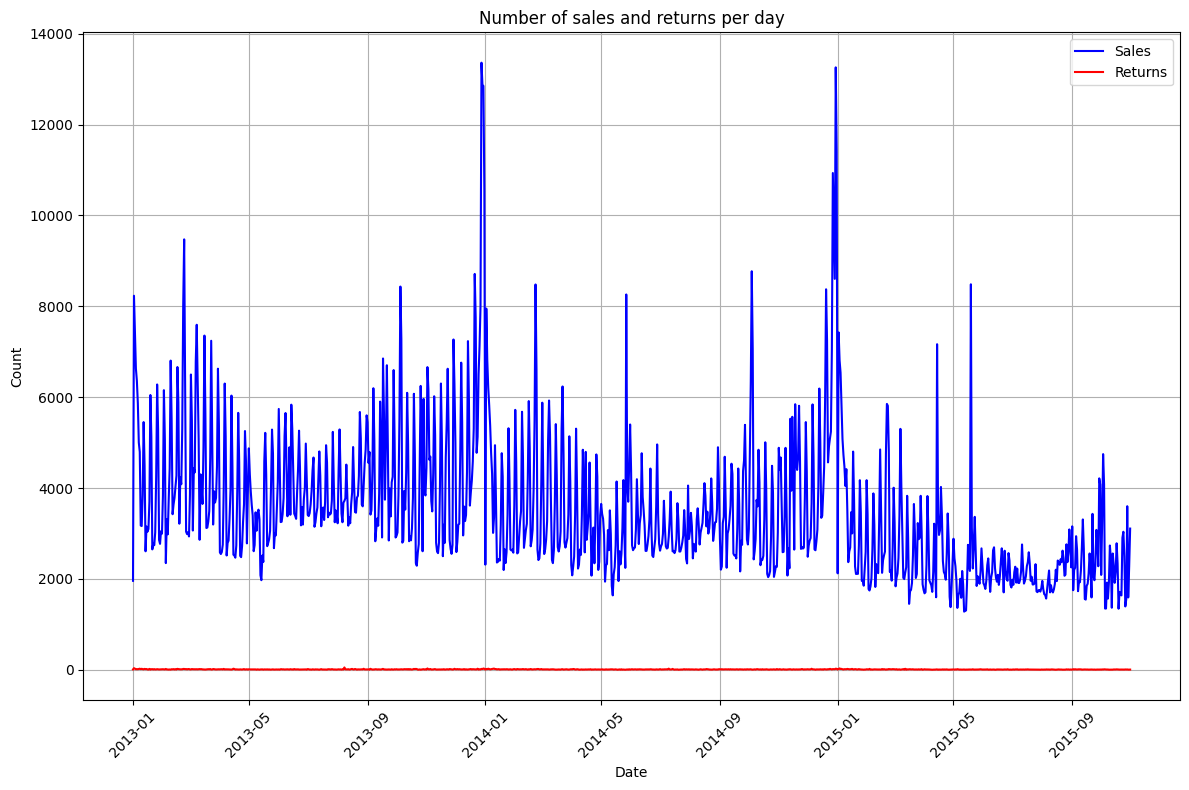

In [313]:
df = sales_train_data.copy() 
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

sales = df[df['item_cnt_day'] > 0].groupby('date')['item_cnt_day'].sum().reset_index()
returns = df[df['item_cnt_day'] < 0].groupby('date')['item_cnt_day'].sum().reset_index()

returns['item_cnt_day'] = returns['item_cnt_day'].abs()

merged_df = pd.merge(sales, returns, on='date', how='outer', suffixes=('_sales', '_returns')).fillna(0)

plt.figure(figsize=(12, 8))
plt.plot(merged_df['date'], merged_df['item_cnt_day_sales'], label='Sales', color='blue')
plt.plot(merged_df['date'], merged_df['item_cnt_day_returns'], label='Returns', color='red')
plt.title('Number of sales and returns per day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*The number of returns is much less than the number of sales and does not vary over time. I believe that negative values ​​are the number of returns.*

## 2.3 Large number of sales and returns

In [320]:
sales_train_data.sort_values(by='item_cnt_day', ascending=False).head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2864235,30.09.2015,32,12,9248,1692.526158,669.0
2851091,30.09.2015,32,55,9249,1702.825746,637.0
2608040,14.04.2015,27,12,3731,1904.548077,624.0
2626181,19.05.2015,28,12,11373,155.192950,539.0
2851073,29.09.2015,32,55,9249,1500.000000,533.0
2048518,02.10.2014,21,12,9242,1500.000000,512.0
2067669,09.10.2014,21,55,19437,899.000000,508.0
2864260,29.09.2015,32,12,9248,1500.000000,504.0


In [321]:
sales_train_data.sort_values(by='item_cnt_day', ascending=True).head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1057907,02.11.2013,10,12,8023,15.000000,-22.0
1835454,10.07.2014,18,14,20949,5.000000,-16.0
2048519,10.10.2014,21,12,9242,1433.333333,-9.0
59156,18.01.2013,0,12,1590,2599.000000,-6.0
940092,19.10.2013,9,42,3732,2599.000000,-6.0
2619997,29.05.2015,28,6,4894,3999.000000,-5.0
2458733,18.02.2015,25,2,16790,2899.000000,-5.0
93576,21.01.2013,0,43,20384,1599.000000,-5.0
59155,10.01.2013,0,12,1590,2599.000000,-5.0
222426,22.02.2013,1,28,21323,199.000000,-4.0


*Large volumes of sales are not common which may mean more purchases and lots of defective item for a large number of returns*

## 2.4 Very big and very small prices

In [327]:
sales_train_data.sort_values(by='item_price', ascending=False).head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0
885138,17.09.2013,8,12,11365,59200.0,1.0
1488135,20.03.2014,14,25,13199,50999.0,1.0
2327159,29.01.2015,24,12,7241,49782.0,1.0
2931380,20.10.2015,33,22,13403,42990.0,1.0
2917760,20.10.2015,33,3,13403,42990.0,1.0
2910156,29.10.2015,33,12,13403,42990.0,1.0
2885692,23.10.2015,33,42,13403,42990.0,1.0
1006638,24.10.2013,9,12,7238,42000.0,1.0
2910155,20.10.2015,33,12,13403,41990.0,1.0


In [336]:
items_data[items_data.item_id == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [337]:
sales_train_data[sales_train_data.item_id == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [339]:
sales_train_data.sort_values(by='item_price', ascending=True).head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0000,1.0
608763,08.06.2013,5,58,11865,0.0700,1.0
579766,11.06.2013,5,6,11864,0.0700,1.0
611400,08.06.2013,5,58,20146,0.0875,4.0
673155,31.07.2013,6,6,11872,0.0900,1.0
745118,09.08.2013,7,42,11853,0.1000,1.0
546031,01.06.2013,5,44,11854,0.1000,1.0
546032,05.06.2013,5,44,11854,0.1000,1.0
546033,09.06.2013,5,44,11855,0.1000,1.0
546034,01.06.2013,5,44,11857,0.1000,1.0


*Very high and very low prices are not outliers, they reflect the real cost of goods*

## 2.5 Check missed data

In [34]:
sales_train_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [314]:
test_data.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

## 2.6 Check type of data

In [35]:
sales_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


*I think it's better to switch to the date format for convenient work*

In [322]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
